## Imports

In [1]:

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import cv2

from numpy import genfromtxt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import *
from sklearn.ensemble import *
import graphviz 
from mpl_toolkits.mplot3d import Axes3D

#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 16
%matplotlib inline

In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('y_test_smpl.csv', delimiter=',', skip_header =1 )


In [4]:
count = 0
for x in y_test:
    if x == 7:
        count +=1
print(count)
print(len(y_test))

60
4170


In [5]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [6]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [7]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [8]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)


In [9]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [10]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [11]:
x_train.shape

(12660, 256)

In [12]:
y_train.shape

(12660,)

#### Data for Q6 and Q7

In [13]:
#split data for q6
x_train_q6, x_test_q6, y_train_q6, y_test_q6 = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train)
#combine test sets
x_test_q6 = np.append(x_test_q6,x_test, axis=0)
y_test_q6 = np.append(y_test_q6,y_test, axis=0)

#split data for q7
x_train_q7, x_test_q7, y_train_q7, y_test_q7 = train_test_split(x_train, y_train, test_size=0.7, stratify=y_train)
#combine test sets
x_test_q7 = np.append(x_test_q7,x_test, axis=0)
y_test_q7 = np.append(y_test_q7,y_test, axis=0)

print("Test data:",x_test.shape)
print("Test data q6:",x_test_q6.shape)
print("Test data q7:",x_test_q7.shape)

print("Train data:",x_train.shape)
print("Train data q6:",x_train_q6.shape)
print("Train data q7:",x_train_q7.shape)

Test data: (4170, 256)
Test data q6: (7968, 256)
Test data q7: (13032, 256)
Train data: (12660, 256)
Train data q6: (8862, 256)
Train data q7: (3798, 256)


## Tree Clasifier

In [14]:
#basic tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
#tree.plot_tree(clf.fit(x_train, y_train)) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("first") 

'first.pdf'

In [16]:
y_pred_ga = clf.predict(x_test)

In [17]:
cm = confusion_matrix(y_test,y_pred_ga)

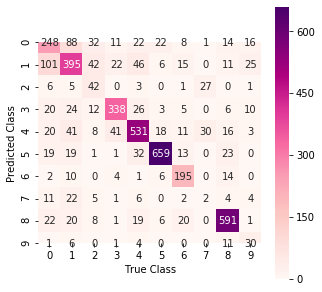

In [18]:
#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=True)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [19]:
#classification report
print(classification_report(y_test,y_pred_ga))

              precision    recall  f1-score   support

         0.0       0.54      0.55      0.54       450
         1.0       0.60      0.63      0.61       630
         2.0       0.49      0.28      0.36       150
         3.0       0.76      0.80      0.78       420
         4.0       0.74      0.77      0.75       690
         5.0       0.86      0.92      0.89       720
         6.0       0.84      0.72      0.78       270
         7.0       0.04      0.03      0.03        60
         8.0       0.86      0.86      0.86       690
         9.0       0.57      0.33      0.42        90

    accuracy                           0.73      4170
   macro avg       0.63      0.59      0.60      4170
weighted avg       0.72      0.73      0.72      4170



## Ten Fold Cross Validation


In [20]:
#create model and run 10 fold cross validation
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring="f1_macro")
print(scores) #score is an array of f1 scores 
print("Average F score:", scores.mean())

[0.90031889 0.88511937 0.86653167 0.8685167  0.88802209 0.88474539
 0.87463012 0.87265589 0.85715472 0.89297972]
Average F score: 0.8790674557270846


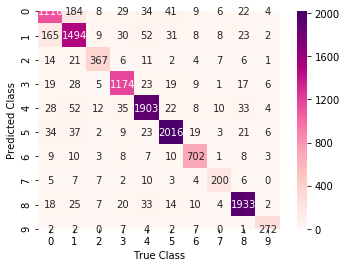

In [21]:
#better way
clf = tree.DecisionTreeClassifier()
y_pred = cross_val_predict(clf, x_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)
#confusion matrix
sns.heatmap(conf_mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=True)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1410
         1.0       0.82      0.80      0.81      1860
         2.0       0.84      0.87      0.85       420
         3.0       0.90      0.89      0.90      1320
         4.0       0.90      0.91      0.90      2100
         5.0       0.93      0.93      0.93      2160
         6.0       0.92      0.90      0.91       780
         7.0       0.82      0.83      0.83       240
         8.0       0.94      0.93      0.93      2070
         9.0       0.92      0.91      0.91       300

    accuracy                           0.88     12660
   macro avg       0.88      0.88      0.88     12660
weighted avg       0.88      0.88      0.88     12660



In [23]:
#try manual 10 fold
clf = tree.DecisionTreeClassifier()
kf = KFold(n_splits=10)
cr = []

for train_index, test_index in kf.split(y_train):
    x_train10, x_test10 = x_train[train_index], x_train[test_index]
    y_train10, y_test10 = y_train[train_index], y_train[test_index] 
    clf.fit(x_train10, y_train10)
    #print(confusion_matrix(y_test, clf.predict(x_test)))
    cr.append(classification_report(y_test,clf.predict(x_test), output_dict=True))
#print(cr[-1])

In [24]:
#calculate results from 10 fold cross validation
f1mean = 0
recall = 0
precision = 0
for x in cr:
    dictionary = x['macro avg']
    f1mean += dictionary['f1-score']
    recall += dictionary['recall']
    precision += dictionary['precision']
f1mean = f1mean / 10
recall = recall / 10
precision = precision / 10
print("mean f1:",f1mean)
print("mean recall:",recall)
print("mean precision:",precision)

mean f1: 0.6573791949367371
mean recall: 0.6429560501495285
mean precision: 0.6827701768569587


## Test overfitting - j48 equivilent

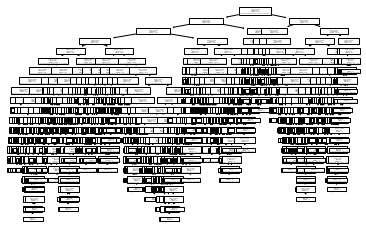

In [25]:
#try standared tree with no limmits 
clf = tree.DecisionTreeClassifier()
#clf.fit(x_train, y_train)
tree.plot_tree(clf.fit(x_train, y_train)) 
dot_data = tree.export_graphviz(clf, out_file=None) 

#graph.render("first") 

In [26]:
graph = graphviz.Source(dot_data) 
graph.render("overfitting_tree") 
#predict on test set
y_pred_test_data = clf.predict(x_test)
print(classification_report(y_test, y_pred_test_data))

              precision    recall  f1-score   support

         0.0       0.50      0.56      0.52       450
         1.0       0.60      0.64      0.62       630
         2.0       0.54      0.38      0.45       150
         3.0       0.82      0.85      0.83       420
         4.0       0.78      0.74      0.76       690
         5.0       0.88      0.91      0.89       720
         6.0       0.86      0.73      0.79       270
         7.0       0.04      0.03      0.03        60
         8.0       0.83      0.85      0.84       690
         9.0       0.66      0.37      0.47        90

    accuracy                           0.73      4170
   macro avg       0.65      0.61      0.62      4170
weighted avg       0.73      0.73      0.73      4170



In [27]:
#now predict on training set - will be alot better than predictions on test - shows overfitting
y_pred_train_data = clf.predict(x_train)
print(classification_report(y_train, y_pred_train_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1410
         1.0       1.00      1.00      1.00      1860
         2.0       1.00      1.00      1.00       420
         3.0       1.00      1.00      1.00      1320
         4.0       1.00      1.00      1.00      2100
         5.0       1.00      1.00      1.00      2160
         6.0       1.00      1.00      1.00       780
         7.0       1.00      1.00      1.00       240
         8.0       1.00      1.00      1.00      2070
         9.0       1.00      1.00      1.00       300

    accuracy                           1.00     12660
   macro avg       1.00      1.00      1.00     12660
weighted avg       1.00      1.00      1.00     12660



#### limit fitting

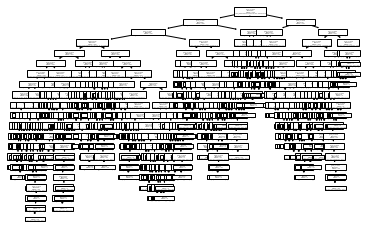

In [28]:
#try and limit overfitting
clf_list = []
split = (0.02, 0.015, 0.01, 0.008, 0.006, 0.004,0.002, 0.001)
for x in split:
    clf_smpl_splt = tree.DecisionTreeClassifier(min_samples_split = x)
    tree.plot_tree(clf_smpl_splt.fit(x_train, y_train)) 
    dot_data = tree.export_graphviz(clf_smpl_splt, out_file=None) 
    clf_list.append( clf_smpl_splt)

 

next model, with split = 0.02
on test:
               precision    recall  f1-score   support

         0.0       0.60      0.52      0.56       450
         1.0       0.55      0.48      0.52       630
         2.0       0.35      0.40      0.38       150
         3.0       0.60      0.78      0.68       420
         4.0       0.66      0.73      0.70       690
         5.0       0.89      0.91      0.90       720
         6.0       0.55      0.50      0.53       270
         7.0       0.00      0.00      0.00        60
         8.0       0.84      0.84      0.84       690
         9.0       0.35      0.20      0.25        90

    accuracy                           0.68      4170
   macro avg       0.54      0.54      0.53      4170
weighted avg       0.67      0.68      0.67      4170



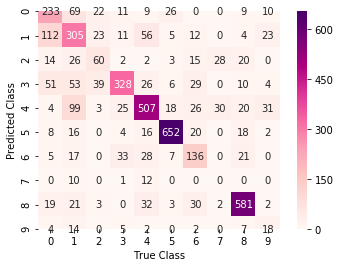

on train:
               precision    recall  f1-score   support

         0.0       0.66      0.61      0.63      1410
         1.0       0.69      0.68      0.69      1860
         2.0       0.54      0.78      0.64       420
         3.0       0.66      0.85      0.74      1320
         4.0       0.85      0.87      0.86      2100
         5.0       0.93      0.85      0.89      2160
         6.0       0.82      0.76      0.79       780
         7.0       0.38      0.04      0.07       240
         8.0       0.86      0.87      0.86      2070
         9.0       0.63      0.57      0.60       300

    accuracy                           0.77     12660
   macro avg       0.70      0.69      0.68     12660
weighted avg       0.78      0.77      0.77     12660

next model, with split = 0.015
on test:
               precision    recall  f1-score   support

         0.0       0.61      0.51      0.55       450
         1.0       0.57      0.49      0.53       630
         2.0       0.38   

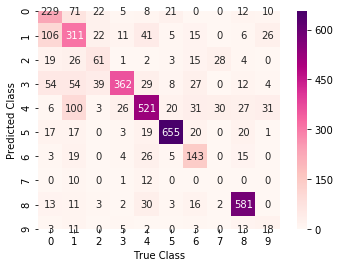

on train:
               precision    recall  f1-score   support

         0.0       0.70      0.63      0.66      1410
         1.0       0.71      0.69      0.70      1860
         2.0       0.60      0.82      0.70       420
         3.0       0.67      0.88      0.76      1320
         4.0       0.85      0.88      0.86      2100
         5.0       0.92      0.88      0.90      2160
         6.0       0.88      0.81      0.84       780
         7.0       0.38      0.04      0.07       240
         8.0       0.91      0.90      0.91      2070
         9.0       0.63      0.57      0.60       300

    accuracy                           0.80     12660
   macro avg       0.73      0.71      0.70     12660
weighted avg       0.80      0.80      0.79     12660

next model, with split = 0.01
on test:
               precision    recall  f1-score   support

         0.0       0.56      0.51      0.53       450
         1.0       0.53      0.63      0.58       630
         2.0       0.46    

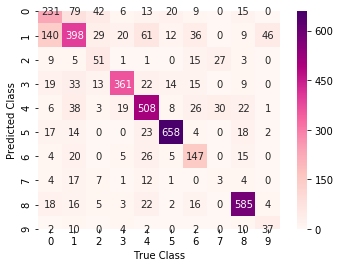

on train:
               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      1410
         1.0       0.71      0.77      0.74      1860
         2.0       0.76      0.81      0.78       420
         3.0       0.81      0.89      0.85      1320
         4.0       0.90      0.87      0.88      2100
         5.0       0.94      0.90      0.92      2160
         6.0       0.84      0.87      0.86       780
         7.0       0.64      0.62      0.63       240
         8.0       0.94      0.92      0.93      2070
         9.0       0.82      0.70      0.75       300

    accuracy                           0.84     12660
   macro avg       0.81      0.80      0.81     12660
weighted avg       0.84      0.84      0.84     12660

next model, with split = 0.008
on test:
               precision    recall  f1-score   support

         0.0       0.54      0.60      0.57       450
         1.0       0.64      0.61      0.63       630
         2.0       0.50   

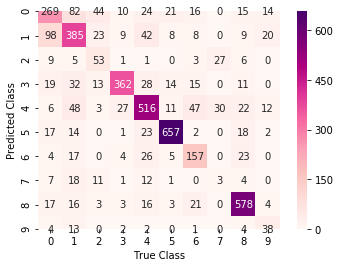

on train:
               precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1410
         1.0       0.81      0.77      0.79      1860
         2.0       0.81      0.85      0.83       420
         3.0       0.81      0.89      0.85      1320
         4.0       0.88      0.88      0.88      2100
         5.0       0.93      0.90      0.92      2160
         6.0       0.85      0.89      0.87       780
         7.0       0.65      0.73      0.69       240
         8.0       0.95      0.92      0.93      2070
         9.0       0.85      0.75      0.80       300

    accuracy                           0.86     12660
   macro avg       0.83      0.83      0.83     12660
weighted avg       0.86      0.86      0.86     12660

next model, with split = 0.006
on test:
               precision    recall  f1-score   support

         0.0       0.55      0.60      0.57       450
         1.0       0.59      0.58      0.58       630
         2.0       0.52   

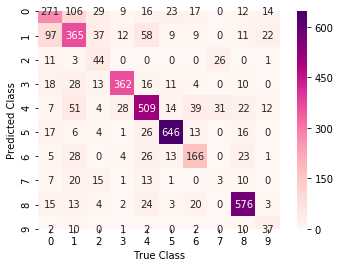

on train:
               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1410
         1.0       0.82      0.81      0.82      1860
         2.0       0.92      0.84      0.88       420
         3.0       0.89      0.90      0.89      1320
         4.0       0.89      0.89      0.89      2100
         5.0       0.93      0.92      0.93      2160
         6.0       0.84      0.91      0.87       780
         7.0       0.65      0.81      0.72       240
         8.0       0.96      0.93      0.94      2070
         9.0       0.85      0.75      0.80       300

    accuracy                           0.87     12660
   macro avg       0.85      0.86      0.85     12660
weighted avg       0.88      0.87      0.88     12660

next model, with split = 0.004
on test:
               precision    recall  f1-score   support

         0.0       0.55      0.56      0.56       450
         1.0       0.55      0.62      0.58       630
         2.0       0.56   

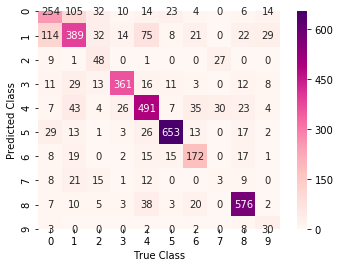

on train:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1410
         1.0       0.83      0.86      0.85      1860
         2.0       0.92      0.86      0.89       420
         3.0       0.92      0.91      0.92      1320
         4.0       0.93      0.89      0.91      2100
         5.0       0.91      0.95      0.93      2160
         6.0       0.90      0.94      0.92       780
         7.0       0.75      0.85      0.80       240
         8.0       0.96      0.94      0.95      2070
         9.0       0.95      0.75      0.84       300

    accuracy                           0.90     12660
   macro avg       0.89      0.88      0.88     12660
weighted avg       0.90      0.90      0.90     12660

next model, with split = 0.002
on test:
               precision    recall  f1-score   support

         0.0       0.57      0.59      0.58       450
         1.0       0.60      0.61      0.61       630
         2.0       0.53   

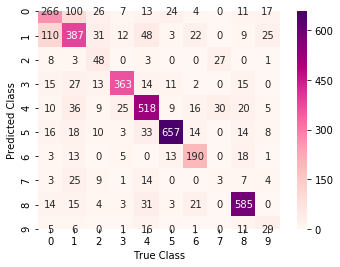

on train:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      1410
         1.0       0.90      0.90      0.90      1860
         2.0       0.95      0.90      0.93       420
         3.0       0.91      0.94      0.93      1320
         4.0       0.96      0.94      0.95      2100
         5.0       0.95      0.96      0.96      2160
         6.0       0.95      0.95      0.95       780
         7.0       0.86      0.88      0.87       240
         8.0       0.97      0.96      0.97      2070
         9.0       0.86      0.94      0.90       300

    accuracy                           0.93     12660
   macro avg       0.92      0.93      0.92     12660
weighted avg       0.93      0.93      0.93     12660

next model, with split = 0.001
on test:
               precision    recall  f1-score   support

         0.0       0.57      0.58      0.58       450
         1.0       0.59      0.66      0.62       630
         2.0       0.58   

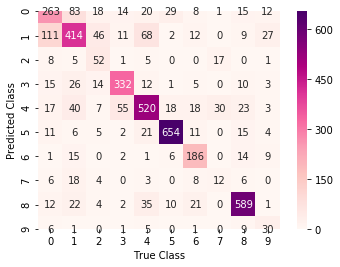

on train:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      1410
         1.0       0.94      0.94      0.94      1860
         2.0       0.96      0.93      0.94       420
         3.0       0.97      0.96      0.96      1320
         4.0       0.96      0.97      0.96      2100
         5.0       0.99      0.98      0.98      2160
         6.0       0.98      0.97      0.98       780
         7.0       0.93      0.94      0.94       240
         8.0       0.99      0.97      0.98      2070
         9.0       0.94      0.97      0.95       300

    accuracy                           0.96     12660
   macro avg       0.96      0.96      0.96     12660
weighted avg       0.96      0.96      0.96     12660



In [29]:
i = 0
for clf_smpl_splt in clf_list:
    #predict on test and training data again
    y_pred_test_data_splt = clf_smpl_splt.predict(x_test)
    y_pred_train_data_splt = clf_smpl_splt.predict(x_train)
    # results on test close to results without limit
    print("next model, with split =",split[i])
    print("on test:\n",classification_report(y_test, y_pred_test_data_splt))
    conf_mat = confusion_matrix(y_test, y_pred_test_data_splt)
    sns.heatmap(conf_mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=True)
    plt.xlabel('True Class')
    plt.ylabel('Predicted Class');
    plt.show()
    #shows overfitting
    print("on train:\n",classification_report(y_train, y_pred_train_data_splt))
    i +=1

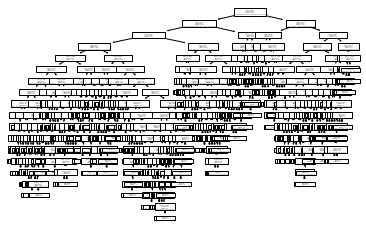

In [30]:
#try another method of limiting fitting
clf_smpl_leaf = tree.DecisionTreeClassifier(min_samples_leaf = 0.0005)
tree.plot_tree(clf_smpl_leaf.fit(x_train, y_train)) 
dot_data = tree.export_graphviz(clf_smpl_leaf, out_file=None)

In [31]:
y_pred_test_data_leaf = clf_smpl_leaf.predict(x_test)
y_pred_train_data_leaf = clf_smpl_leaf.predict(x_train)

print(classification_report(y_test, y_pred_test_data_leaf))

              precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       450
         1.0       0.60      0.64      0.62       630
         2.0       0.59      0.36      0.45       150
         3.0       0.81      0.86      0.83       420
         4.0       0.76      0.77      0.76       690
         5.0       0.86      0.91      0.89       720
         6.0       0.87      0.64      0.74       270
         7.0       0.08      0.05      0.06        60
         8.0       0.83      0.83      0.83       690
         9.0       0.50      0.32      0.39        90

    accuracy                           0.73      4170
   macro avg       0.64      0.60      0.61      4170
weighted avg       0.73      0.73      0.73      4170



In [32]:
print(classification_report(y_train, y_pred_train_data_leaf))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1410
         1.0       0.91      0.91      0.91      1860
         2.0       0.92      0.91      0.92       420
         3.0       0.95      0.94      0.94      1320
         4.0       0.93      0.95      0.94      2100
         5.0       0.97      0.96      0.97      2160
         6.0       0.97      0.95      0.96       780
         7.0       0.89      0.90      0.90       240
         8.0       0.97      0.96      0.97      2070
         9.0       0.94      0.95      0.95       300

    accuracy                           0.94     12660
   macro avg       0.93      0.93      0.93     12660
weighted avg       0.94      0.94      0.94     12660



### Run with Q6 test Data

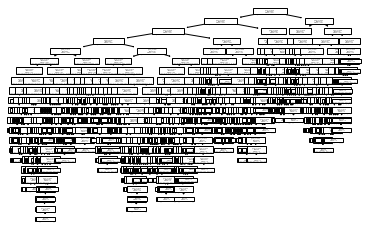

In [33]:
#now train with smaller data set for q6 and larger test set
clf2 = tree.DecisionTreeClassifier()
#clf.fit(x_train, y_train)
tree.plot_tree(clf2.fit(x_train_q6, y_train_q6)) 
dot_data = tree.export_graphviz(clf2, out_file=None) 


In [34]:
#use model to predict for test set
y_pred_test_q6 = clf2.predict(x_test_q6)
print(classification_report(y_test_q6, y_pred_test_q6))

              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62       873
         1.0       0.69      0.71      0.70      1188
         2.0       0.73      0.66      0.70       276
         3.0       0.89      0.84      0.86       816
         4.0       0.82      0.85      0.83      1320
         5.0       0.90      0.90      0.90      1368
         6.0       0.85      0.83      0.84       504
         7.0       0.44      0.53      0.48       132
         8.0       0.89      0.89      0.89      1311
         9.0       0.84      0.62      0.71       180

    accuracy                           0.80      7968
   macro avg       0.77      0.75      0.75      7968
weighted avg       0.80      0.80      0.80      7968



In [35]:
#to check overfitting - predict train set
y_pred_train_q6 = clf2.predict(x_train_q6)
print(classification_report(y_train_q6, y_pred_train_q6))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       987
         1.0       1.00      1.00      1.00      1302
         2.0       1.00      1.00      1.00       294
         3.0       1.00      1.00      1.00       924
         4.0       1.00      1.00      1.00      1470
         5.0       1.00      1.00      1.00      1512
         6.0       1.00      1.00      1.00       546
         7.0       1.00      1.00      1.00       168
         8.0       1.00      1.00      1.00      1449
         9.0       1.00      1.00      1.00       210

    accuracy                           1.00      8862
   macro avg       1.00      1.00      1.00      8862
weighted avg       1.00      1.00      1.00      8862



### Run with Q7 data

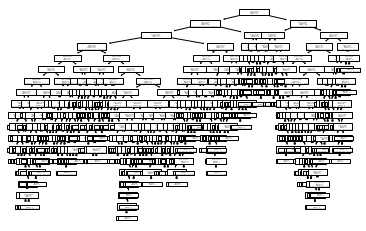

In [36]:
#now train with smaller data set for q7 and larger test set
clf2 = tree.DecisionTreeClassifier()
#clf.fit(x_train, y_train)
tree.plot_tree(clf2.fit(x_train_q7, y_train_q7)) 
dot_data = tree.export_graphviz(clf2, out_file=None) 

In [37]:
#use model to predict for test set
y_pred_test_q7 = clf2.predict(x_test_q7)
print(classification_report(y_test_q7, y_pred_test_q7))

              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65      1437
         1.0       0.69      0.68      0.68      1932
         2.0       0.78      0.70      0.74       444
         3.0       0.85      0.84      0.84      1344
         4.0       0.82      0.83      0.82      2160
         5.0       0.85      0.90      0.87      2232
         6.0       0.83      0.78      0.80       816
         7.0       0.60      0.73      0.66       228
         8.0       0.88      0.85      0.86      2139
         9.0       0.67      0.68      0.68       300

    accuracy                           0.79     13032
   macro avg       0.76      0.76      0.76     13032
weighted avg       0.79      0.79      0.79     13032



In [38]:
#to check overfitting - predict train set
y_pred_train_q7 = clf2.predict(x_train_q7)
print(classification_report(y_train_q7, y_pred_train_q7))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       423
         1.0       1.00      1.00      1.00       558
         2.0       1.00      1.00      1.00       126
         3.0       1.00      1.00      1.00       396
         4.0       1.00      1.00      1.00       630
         5.0       1.00      1.00      1.00       648
         6.0       1.00      1.00      1.00       234
         7.0       1.00      1.00      1.00        72
         8.0       1.00      1.00      1.00       621
         9.0       1.00      1.00      1.00        90

    accuracy                           1.00      3798
   macro avg       1.00      1.00      1.00      3798
weighted avg       1.00      1.00      1.00      3798



## Random Forest

In [39]:
rnd_forest = RandomForestClassifier(n_estimators = 10)
rnd_forest.fit(x_train, y_train)
y_pred_rf = rnd_forest.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.62      0.57      0.59       450
         1.0       0.65      0.80      0.72       630
         2.0       0.80      0.44      0.57       150
         3.0       0.93      0.93      0.93       420
         4.0       0.82      0.88      0.85       690
         5.0       0.93      0.98      0.96       720
         6.0       0.94      0.82      0.88       270
         7.0       0.32      0.10      0.15        60
         8.0       0.93      0.92      0.92       690
         9.0       1.00      0.53      0.70        90

    accuracy                           0.82      4170
   macro avg       0.79      0.70      0.73      4170
weighted avg       0.83      0.82      0.82      4170

